[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/pyinat/pyinaturalist/main?filepath=examples%2FData%2520Visualizations%2520-%2520Matplotlib.ipynb)

# Matplotlib example
Here is an example of making a simple seasonality chart using [matplotlib](https://matplotlib.org/).

This shows observations counts by month (all years) for monarch butterflies observed in the state of Iowa.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pyinaturalist import iNatClient

client = iNatClient()

In [2]:
# Then, get all observations in that place of a given species
observations = client.observations.search(
    taxon_name='Danaus plexippus',
    photos=True,
    geo=True,
    geoprivacy='open',
    place_id=24,
).all()

print(len(observations))

# Convert observations to DataFrame
df = pd.DataFrame(
    [
        {
            'observed_on': obs.observed_on,
            'observed_month': obs.observed_on.month if obs.observed_on else None,
        }
        for obs in observations
    ]
)

print(df.head())

2195
                 observed_on  observed_month
0        2013-05-28 00:00:00             5.0
1        2009-08-01 00:00:00             8.0
2  2015-07-04 12:53:15-05:00             7.0
3  2015-08-19 14:04:39-05:00             8.0
4  2016-08-10 19:39:30-05:00             8.0


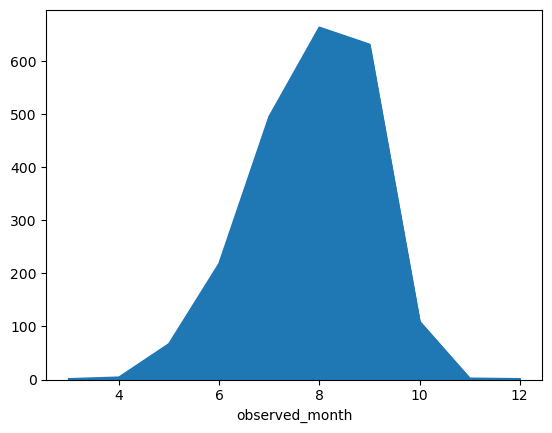

In [3]:
# Plot observation counts by month
df['observed_month'].groupby(df['observed_month']).count().plot(kind='area')
plt.show()